<a href="https://colab.research.google.com/github/avaniii21/Comparative-Analysis-of-BSE-SENSEX-and-NSE-NIFTY/blob/main/BSEN'_ARIMA_AI_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING OF DATASET**

In [ ]:
!pip install ta

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
import ta
import matplotlib.pyplot as plt

# Download stock data
ticker = "^BSESN"
start_date = "2019-01-02"
end_date = "2024-01-02"
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Data Preprocessing
stock_data.dropna(inplace=True)  # Handle Missing Values



[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,36198.128906,36236.699219,35734.011719,35891.519531,35891.519531,14705400
2019-01-03,35934.500000,35999.660156,35475.570312,35513.710938,35513.710938,17400
2019-01-04,35590.789062,35744.199219,35382.078125,35695.101562,35695.101562,15855600
2019-01-07,35971.179688,36076.949219,35809.230469,35850.160156,35850.160156,14831200
2019-01-08,35964.621094,36037.351562,35753.949219,35980.929688,35980.929688,16218000


In [ ]:
# Calculate additional features
stock_data['SMA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['rsi'] = ta.momentum.RSIIndicator(stock_data['Close'], window=14).rsi()
stock_data['Volatility'] = stock_data['Close'].pct_change().rolling(window=10, min_periods=1).std()
stock_data['Lagged_Return'] = stock_data['Close'].pct_change().shift(1)

In [ ]:

# Normalize the data
normalized_data = (stock_data - stock_data.min()) / (stock_data.max() - stock_data.min())

# Handle any additional missing values after feature engineering
normalized_data.dropna(inplace=True)

In [ ]:
# Use only 'Close' for ARIMA, as ARIMA is univariate
train_data = normalized_data['Close'].iloc[:int(0.8 * len(normalized_data))]
test_data = normalized_data['Close'].iloc[int(0.8 * len(normalized_data)):]

In [ ]:
# ARIMA Model Training
p = d = q = range(0, 3)  # Setting the parameter range
pdq_combinations = list(itertools.product(p, d, q))

best_mse = float('inf')
best_order = None

for combination in pdq_combinations:
    try:
        temp_model = ARIMA(train_data, order=combination).fit()
        temp_forecast = temp_model.forecast(steps=len(test_data))

        temp_mse = mean_squared_error(test_data, temp_forecast)
        if temp_mse < best_mse:
            best_mse = temp_mse
            best_order = combination
    except:
        continue

print(f"Best ARIMA Order: {best_order}")
arima_model = ARIMA(train_data, order=best_order).fit()
arima_forecast = arima_model.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Best ARIMA Order: (2, 2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(f"Best ARIMA Order: {best_order}")
arima_model = ARIMA(train_data, order=best_order).fit()
arima_forecast = arima_model.forecast(steps=len(test_data))

# Model Evaluation
mse_arima = mean_squared_error(test_data, arima_forecast)
rmse_arima = np.sqrt(mse_arima)
print(f"ARIMA MSE: {mse_arima}")
print(f"ARIMA RMSE: {rmse_arima}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best ARIMA Order: (2, 2, 2)
ARIMA MSE: 0.0020476948807768825
ARIMA RMSE: 0.045251462747372954


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


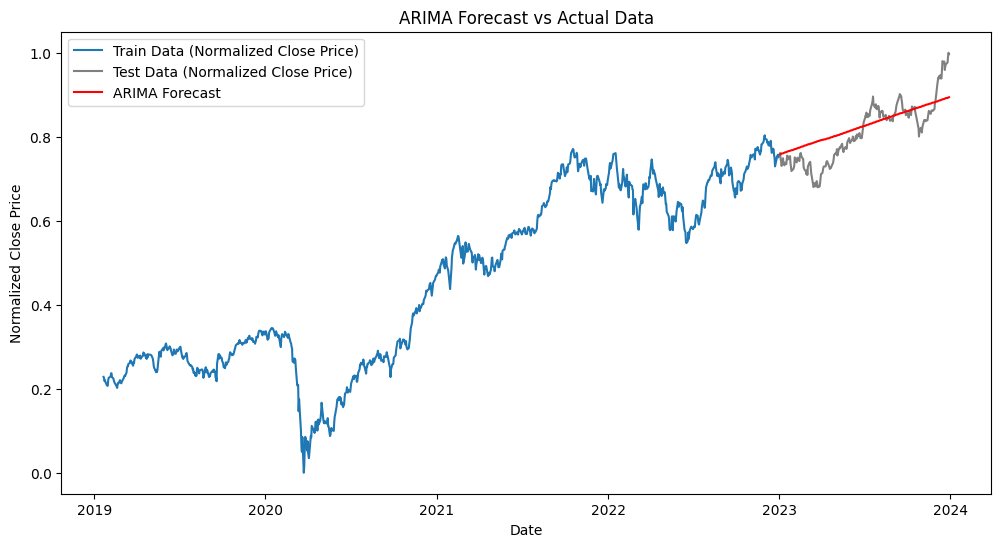

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(normalized_data.index[:int(0.8 * len(normalized_data))], train_data, label='Train Data (Normalized Close Price)')
plt.plot(normalized_data.index[int(0.8 * len(normalized_data)):], test_data, label='Test Data (Normalized Close Price)', color='gray')
plt.plot(normalized_data.index[int(0.8 * len(normalized_data)):], arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manually set SARIMA parameters
order = (1, 1, 1)  # Example: (p, d, q)
seasonal_order = (1, 1, 1, 48)  # Example: (P, D, Q, s)

# Fit the model with the specified parameters
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Optionally, calculate MSE if test_data is available
mse = mean_squared_error(test_data, forecast)
print(f'MSE: {mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

MSE: 0.0021683017028757278


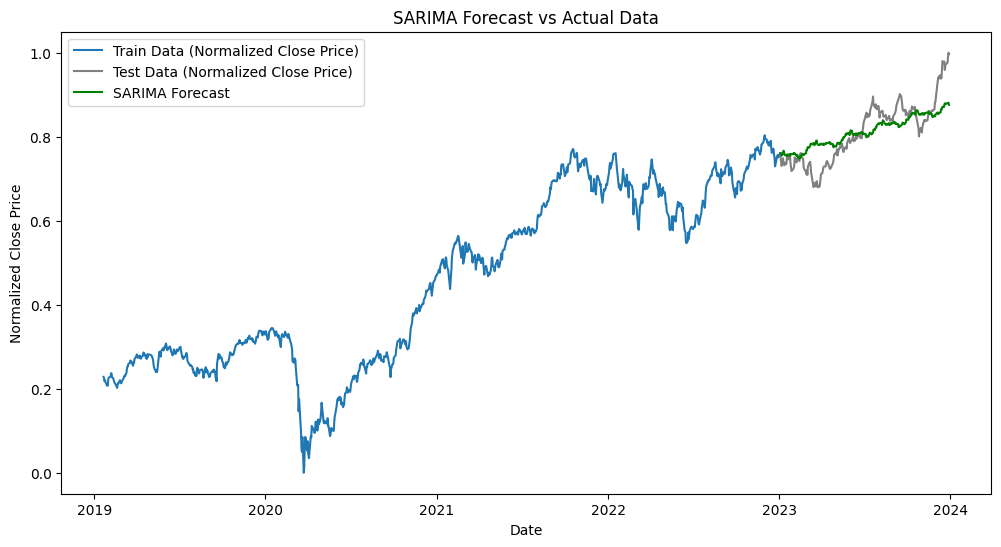

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(normalized_data.index[:int(0.8 * len(normalized_data))], train_data, label='Train Data (Normalized Close Price)')
plt.plot(normalized_data.index[int(0.8 * len(normalized_data)):], test_data, label='Test Data (Normalized Close Price)', color='gray')
plt.plot(normalized_data.index[int(0.8 * len(normalized_data)):], forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

In [ ]:
# Assuming 'normalized_data' already includes 'Close', 'rsi', 'SMA_10', 'Volatility'

# Splitting the normalized data into training and testing datasets including exogenous variables
train_size = int(0.8 * len(normalized_data))
test_size = len(normalized_data) - train_size

train_data, test_data = normalized_data.iloc[:train_size], normalized_data.iloc[train_size:]

# Exogenous variables for training and testing (excluding 'Close' for SARIMAX's exog parameter)
exog_train = train_data[['rsi', 'SMA_10', 'Volatility']]
exog_test = test_data[['rsi', 'SMA_10', 'Volatility']]

# Target variable
y_train = train_data['Close']
y_test = test_data['Close']

# Fitting the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 48)
                ,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(y_test), exog=exog_test)

# Continue with evaluation and visualization as needed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

MSE: 0.001215539358354384


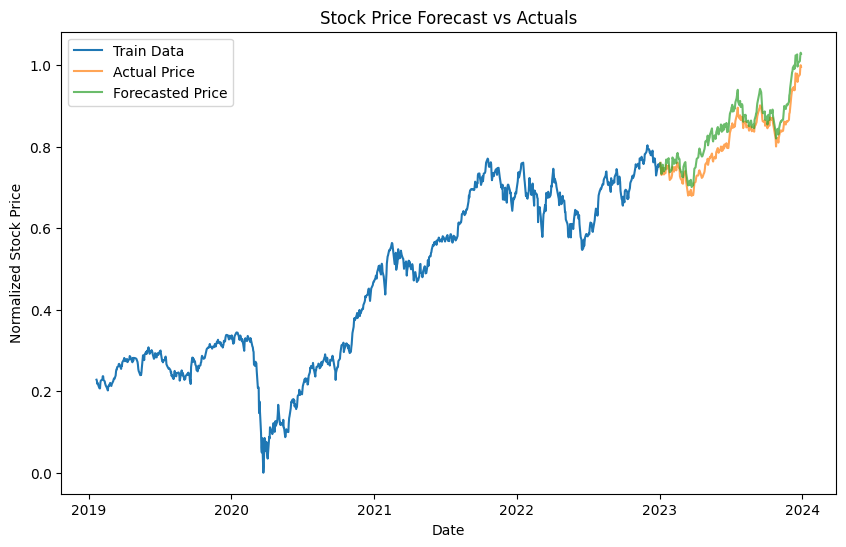

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Evaluation
mse = mean_squared_error(y_test, forecast)
#mse = mean_squared_error(y_train,forecast)
print(f"MSE: {mse}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train Data')
plt.plot(y_test.index, y_test, label='Actual Price', alpha=0.7)
plt.plot(y_test.index, forecast, label='Forecasted Price', alpha=0.7)
plt.title('Stock Price Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.show()
